# 인공 신경망

**목표: 딥러닝과 인공 신경망 알고리즘을 이해하고 텐서플로를 사용해 간단한 인공 신경망 모델을 만들어 봅니다.**

- 인공 신경망: 생물학적 뉴런에서 영감을 받아 만든 머신러닝 알고리즘입니다. 인공 신경망 알고리즘을 종종 딥러닝이라고도 부릅니다.
- 텐서플로: 구글이 만든 딥러닝 라이브러리로 매우 인기가 높습니다.
- 밀집층: 가장 간단한 인공 신경망의 층입니다. 인공 신경망에는 여러 종류의 층이 있습니다. 밀집층에서는 뉴런들이 모두 연결되어 있기 때문에 완전 연결 층이라고도 부릅니다. 특별히 출력층에 밀집층을 사용할 때는 분류하려는 클래스와 동일한 개수의 뉴런을 사용합니다.
- 원-핫 인코딩: 정숫값을 배열에서 해당 정수 위치의 원소만 1 이고 나머지는 모두 0으로 변환합니다. 이런 변환이 필요한 이유는 다중 분류에서 출력층에서 만든 확률과 크로스 엔트로피
손실을 계산하기 위해서 입니다. 텐서플로에서는 'sparse_categorical_entropy' 손실을 지정하면 이런 변환을 수행할 필요가 없습니다.

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST

In [ ]:
# 패션 MNIST 데이터는 딥러닝 라이브러리에 저장되어 있다.
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()   # load_data(): 훈련 데이터와 테스트 데이터를 나누어 반환

In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


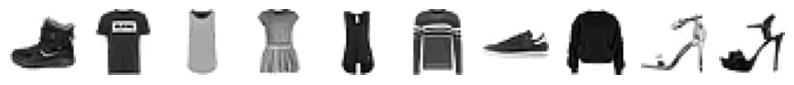

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
# 패션 MNIST의 타깃은 0〜9까지의 숫자 레이블로 구성

print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np

print(np.unique(train_target, return_counts=True))  #unique()로 레이블 당 샘플 개수 확인

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

**훈련 샘플은 60000개나 되기 때문에 전체 데이터를 한꺼번에 사용하여 모델을 훈련하는 것보다 샘플을 하나씩 꺼내서 모델을 훈련하는 방법이 더 효울적이기 때문이다.**

SGDClassifier를 사용할 때 표준화 전처리된 데이터를
사용했습니다. 그 이유가 기 억나나요? 확률적 경사 하강법은 여러 특성 중 기울기가 가장 가파른 방
향을 따라 이동합니다. 만약 특성마다 값의 범위가 많이 다르면 올바르게 손실 함수의 경사를 내려
올 수 없겠죠

> SGDClassifier
- 표준화 전처리
- 1차원 배열 사용

In [ ]:
# 표준화 전처리

train_scaled = train_input / 255.0  # 패션 MNIST의 경우 각 픽셀은 0〜255 사이의 정숫값 -> 0~1 사이의 값으로 정규화해야됨
train_scaled = train_scaled.reshape(-1, 28*28)  # 1차원 배열 형태로 변경

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
# SGDClassifier 클래스와 cross_validate 함수를 사용해 이 데이터에서 교차 검증
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# loss 매개변수를 'log'로 지정하여 로지스틱 손실 함수를 최소화
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


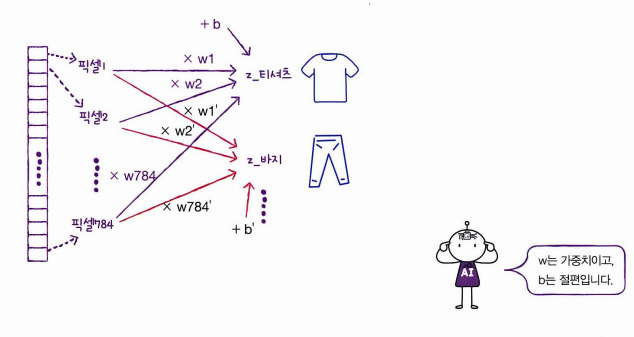

## 인공신경망

**가장 기본적인 인공 신경망은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같습니다.**

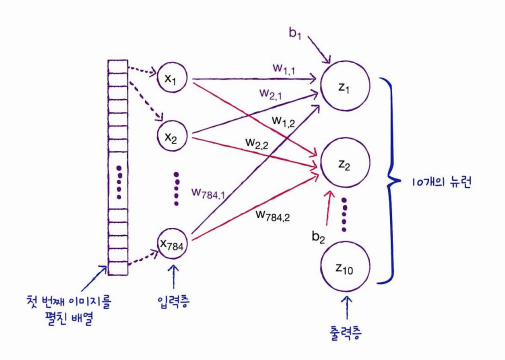

784개의 픽셀 X 10개의 뉴런 = 7840개의 선

### 텐서플로와 케라스

- 텐서플로: 구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리입니다.
- 저수준 API와 고수준 API가 있습니다.
- 케라스가 텐서플로의 고수준 API입니다.
- 텐서플로 라이브러리에 케라스 API가 내장되어있습니다.
- 텐서플로 = 케라스
 

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

## 인공신경망(ANN)으로 모델 만들기

인공신경망에서는 교차검증을 하지 않고 검증 세트를 별로도 덜어내어 사용한다.

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))    # 순서대로 뉴런 개수, 뉴런의출력에 적용할 함수 입력의 크기

In [ ]:
model = keras.Sequential(dense) # Sequential 클래스의 객체를 만들 때 앞에서 만든 밀집층의 객체 dense를 전달했습니다.

## 인공신경망으로 패션 아이템 분류하기

- 이진 분류: loss = 'binaiy_crossentropy'
- 다중 분류: loss = 'categorical_crossentropy'
> 원-핫 인코딩: 타깃값을 해당 클래스만 1 이고 나머지는 모두 0인 배열로 만드는 것
> - case1. 원-핫 인코딩으로 변경하지 않았을때
>> - sparse_categorical_crossentropy: 정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산
> - case2. 원-핫 인코딩으로 변경했을때
>> - loss=‘categorical_crossentropy

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')   #  metrics='accuracy': 손실값의 정확도 지표

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

# 5번 반복에서 정확도가 85% 이상

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4230 - accuracy: 0.8559
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4183 - accuracy: 0.8576
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4154 - accuracy: 0.8591
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4113 - accuracy: 0.8622
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4085 - accuracy: 0.8619


In [ ]:
model.evaluate(val_scaled, val_target)

# evaluate () 메서드도 fit() 메서드와 비슷한 출력을 보여 줍니다. 
# 검증 세트의 점수는 훈련 세트 점수보다 조금 낮은 것이 일반적입니다.

375/375 [==============================] - 1s 2ms/step - loss: 0.4526 - accuracy: 0.8465


[0.45262548327445984, 0.8464999794960022]